In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import pickle

from fastai.tabular import *
from fastai.tabular.all import *

In [2]:
full_stats_2012 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2012.csv')
full_stats_2013 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2013.csv')
full_stats_2014 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2014.csv')
full_stats_2015 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2015.csv')
full_stats_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2016.csv')
full_stats_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2017.csv')
full_stats_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2018.csv')
full_stats_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2019.csv')
full_stats_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2020.csv')
full_stats_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2021.csv')
full_stats_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/data/full_data_2022.csv')

full_data_set = full_stats_2012.append([full_stats_2013, full_stats_2014, full_stats_2015, full_stats_2016, full_stats_2017, full_stats_2018, full_stats_2019, full_stats_2020, full_stats_2021, full_stats_2022])

In [3]:
full_data_set.drop(full_data_set[full_data_set['completed']==False].index, inplace=True)

In [4]:
full_data_set.drop(['id', 'season', 'week', 'start_time_tbd',
       'completed', 'attendance',
       'venue_id', 'venue', 'home_id', 
       'home_division', 'home_line_scores',
       'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
       'away_id', 'away_division',
       'away_line_scores', 'away_post_win_prob',
       'away_pregame_elo', 'away_postgame_elo', 'excitement_index',
       'highlights'], axis=1, inplace=True)

full_data_set['margin'] = full_data_set['away_points'] - full_data_set['home_points']

full_data_set.head()

,season_type,start_date,neutral_site,conference_game,home_team,home_conference,home_points,away_team,away_conference,away_points,...,home_team_defense_total_ppa,away_team_offense_ppa,away_team_passing_plays_total_ppa,away_team_rushing_plays_total_ppa,away_team_offense_total_ppa,away_team_defense_ppa,away_team_defense_passing_plays_success_rate,away_team_defense_rushing_plays_success_rate,away_team_defense_total_ppa,margin
0,regular,2012-11-03T16:00:00.000Z,False,False,Army,FBS Independents,41.0,Air Force,Mountain West,21.0,...,95.295289,0.112965,11.740499,93.462689,103.927627,0.081142,0.507289,0.410781,72.622258,-20.0
1,regular,2012-11-24T20:30:00.000Z,False,True,Fresno State,Mountain West,48.0,Air Force,Mountain West,15.0,...,-23.141197,0.112965,11.740499,93.462689,103.927627,0.081142,0.507289,0.410781,72.622258,-33.0
2,regular,2012-09-08T19:30:00.000Z,False,False,Michigan,Big Ten,31.0,Air Force,Mountain West,25.0,...,24.113167,0.112965,11.740499,93.462689,103.927627,0.081142,0.507289,0.410781,72.622258,-6.0
3,regular,2012-11-10T20:30:00.000Z,False,True,San Diego State,Mountain West,28.0,Air Force,Mountain West,9.0,...,33.782619,0.112965,11.740499,93.462689,103.927627,0.081142,0.507289,0.410781,72.622258,-19.0
4,regular,2012-09-23T02:00:00.000Z,False,True,UNLV,Mountain West,38.0,Air Force,Mountain West,35.0,...,71.550017,0.112965,11.740499,93.462689,103.927627,0.081142,0.507289,0.410781,72.622258,-3.0


In [5]:
excluded = ['start_date', 'margin', 'home_points',
 'away_points', 'notes']
cat_features = ['season_type', 'neutral_site', 'conference_game', 'home_team', 'home_conference', 'away_team', 'away_conference']
cont_features = [c for c in full_data_set.columns.to_list() if c not in cat_features and c not in excluded]

cont_features

['home_team_offense_ppa',
 'home_team_offense_passing_plays_total_ppa',
 'home_team_offense_rushing_plays_total_ppa',
 'home_team_offense_total_ppa',
 'home_team_defense_ppa',
 'home_team_defense_passing_plays_success_rate',
 'home_team_defense_rushing_plays_success_rate',
 'home_team_defense_total_ppa',
 'away_team_offense_ppa',
 'away_team_passing_plays_total_ppa',
 'away_team_rushing_plays_total_ppa',
 'away_team_offense_total_ppa',
 'away_team_defense_ppa',
 'away_team_defense_passing_plays_success_rate',
 'away_team_defense_rushing_plays_success_rate',
 'away_team_defense_total_ppa']

In [6]:
splits = RandomSplitter(valid_pct=0.2)(range_of(full_data_set))
splits

((#6124) [4861,1657,683,6331,2050,6154,5127,398,3084,5145...],
 (#1530) [1722,4441,1626,3917,4889,1794,3627,4310,4881,1270...])

In [7]:
to = TabularPandas(full_data_set, procs=[Categorify, Normalize],
                    y_names="margin",
                    cat_names = cat_features,
                    cont_names = cont_features,
                   splits=splits)

In [8]:
dls = to.dataloaders(bs=64)

In [9]:
learn = tabular_learner(dls, metrics=mae, lr=10e-1)

SuggestedLRs(valley=0.009120108559727669)

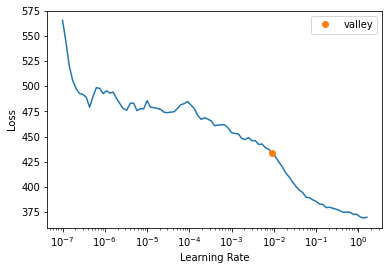

In [10]:
learn.lr_find()

In [11]:
learn = tabular_learner(dls, metrics=mae, lr=10e-2)
learn.fit(10)

epoch,train_loss,valid_loss,mae,time
0,258.457306,237.720978,12.367764,00:01
1,233.615723,229.827927,12.214766,00:01
2,228.637894,233.791489,12.271696,00:01
3,228.315262,228.810165,12.156699,00:00
4,230.307175,244.567490,12.458763,00:01
5,219.048569,231.419464,12.173497,00:00
6,214.612045,235.393646,12.247263,00:00
7,214.021362,252.325470,12.557652,00:00
8,210.467072,235.895569,12.305774,00:01
9,205.080673,249.306549,12.611030,00:01


In [12]:
learn.show_results()

,season_type,neutral_site,conference_game,home_team,home_conference,away_team,away_conference,home_team_offense_ppa,home_team_offense_passing_plays_total_ppa,home_team_offense_rushing_plays_total_ppa,home_team_offense_total_ppa,home_team_defense_ppa,home_team_defense_passing_plays_success_rate,home_team_defense_rushing_plays_success_rate,home_team_defense_total_ppa,away_team_offense_ppa,away_team_passing_plays_total_ppa,away_team_rushing_plays_total_ppa,away_team_offense_total_ppa,away_team_defense_ppa,away_team_defense_passing_plays_success_rate,away_team_defense_rushing_plays_success_rate,away_team_defense_total_ppa,margin,margin_pred
0,2.0,1.0,2.0,81.0,3.0,103.0,3.0,1.133543,1.277389,0.948585,1.472705,0.905120,0.109938,-0.047440,1.292209,0.652456,1.239165,0.277649,1.039956,0.335937,0.335465,0.670331,0.667407,-3.0,3.148613
1,2.0,1.0,1.0,51.0,7.0,74.0,8.0,-0.208686,0.109618,-0.316636,-0.095830,0.877044,0.103874,1.742479,1.103784,0.384557,1.170304,-0.374770,0.579468,-0.578310,-0.723665,-0.709126,-0.469556,40.0,13.188381
2,2.0,1.0,2.0,84.0,10.0,98.0,12.0,-0.206051,-0.454364,0.415946,-0.025275,-1.816996,-0.199903,0.218771,-1.849181,-1.173473,-0.800958,-0.883127,-1.072382,-1.456085,-0.841624,-1.521861,-1.427900,3.0,-11.108562
3,2.0,1.0,2.0,123.0,1.0,99.0,1.0,0.157053,-0.153886,-0.045402,-0.076982,0.880329,-0.579824,0.886264,0.694778,0.519096,-0.728405,0.902172,0.065200,0.076566,0.113726,0.053804,-0.185580,5.0,5.689364
4,2.0,1.0,2.0,76.0,5.0,62.0,6.0,-0.719406,-0.005176,-1.062935,-0.712090,-0.701941,1.085056,0.400779,-0.668473,-1.266835,-0.431865,-1.509670,-1.149958,-2.257827,-1.826718,-3.137161,-2.255360,24.0,12.851826
5,2.0,1.0,2.0,24.0,10.0,84.0,12.0,-1.073606,-1.017318,-0.401683,-1.145631,2.869245,2.404260,2.671316,2.378992,1.839570,0.881858,1.868514,1.719034,0.558179,1.092188,0.460119,0.387060,39.0,36.672489
6,2.0,1.0,2.0,65.0,11.0,104.0,13.0,0.120327,0.548925,-0.475711,0.061952,-0.683547,-0.586369,-0.262811,-0.737025,-0.088539,-0.194878,-0.083078,-0.286584,-0.289890,-1.239256,0.360445,-0.289928,-18.0,-11.034034
7,2.0,1.0,2.0,106.0,3.0,44.0,3.0,1.497241,1.703976,1.718922,2.118372,2.407333,1.044647,2.236060,3.265284,-0.230053,-0.511290,0.270854,-0.159407,0.956441,1.061064,1.065050,1.103109,-35.0,-0.583418
8,2.0,1.0,2.0,30.0,11.0,104.0,13.0,-0.313012,-0.677147,-0.272241,-0.526324,-0.144313,-0.342239,-1.006526,-0.433458,-0.000867,0.538051,-0.336620,0.156710,0.076616,-0.385201,-0.462420,0.290848,2.0,9.994802


In [13]:
learn.export('/content/drive/MyDrive/Colab Notebooks/SEC Prediction Folder/Model/margin_pred_model')

In [14]:
prediction_data = full_stats_2022#.loc[full_stats_2022['season_type'] == 'postseason']

In [15]:
pd.options.mode.chained_assignment = None  # default='warn'

prediction_data.drop(['id', 'season', 'week', 'start_date', 'start_time_tbd',
       'completed', 'attendance',
       'venue_id', 'venue', 'home_id', 
       'home_division', 'home_line_scores',
       'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
       'away_id', 'away_division',
       'away_line_scores', 'away_post_win_prob',
       'away_pregame_elo', 'away_postgame_elo', 'excitement_index',
       'highlights', 'notes'], axis=1, inplace=True)

In [16]:
pdf = prediction_data.copy()
dl = learn.dls.test_dl(pdf)
pdf['predicted'] = learn.get_preds(dl=dl)[0].numpy()
pdf.head()

,season_type,neutral_site,conference_game,home_team,home_conference,home_points,away_team,away_conference,away_points,home_team_offense_ppa,...,home_team_defense_total_ppa,away_team_offense_ppa,away_team_passing_plays_total_ppa,away_team_rushing_plays_total_ppa,away_team_offense_total_ppa,away_team_defense_ppa,away_team_defense_passing_plays_success_rate,away_team_defense_rushing_plays_success_rate,away_team_defense_total_ppa,predicted
0,regular,True,False,Army,FBS Independents,7.0,Air Force,Mountain West,13.0,0.316567,...,135.166721,0.314397,34.502425,190.413645,219.449001,0.133096,0.432,0.414286,71.87204,9.888916
1,regular,False,True,San Diego State,Mountain West,3.0,Air Force,Mountain West,13.0,0.138476,...,50.307873,0.314397,34.502425,190.413645,219.449001,0.133096,0.432,0.414286,71.87204,1.587488
2,regular,False,True,UNLV,Mountain West,7.0,Air Force,Mountain West,42.0,0.173458,...,122.898253,0.314397,34.502425,190.413645,219.449001,0.133096,0.432,0.414286,71.87204,10.157177
3,regular,False,True,Utah State,Mountain West,34.0,Air Force,Mountain West,27.0,0.070730,...,126.239889,0.314397,34.502425,190.413645,219.449001,0.133096,0.432,0.414286,71.87204,14.865096
4,regular,False,True,Wyoming,Mountain West,17.0,Air Force,Mountain West,14.0,0.104569,...,133.387904,0.314397,34.502425,190.413645,219.449001,0.133096,0.432,0.414286,71.87204,6.771113


In [17]:
pdf['margin'] = pdf['away_points'] - pdf['home_points']
pdf[['home_team','away_team','margin','predicted']].round(0)

,home_team,away_team,margin,predicted
0,Army,Air Force,6.0,10.0
1,San Diego State,Air Force,10.0,2.0
2,UNLV,Air Force,35.0,10.0
3,Utah State,Air Force,-7.0,15.0
4,Wyoming,Air Force,-3.0,7.0
...,...,...,...,...
774,Colorado State,Wyoming,1.0,-2.0
775,Fresno State,Wyoming,-30.0,-14.0
776,Hawai'i,Wyoming,7.0,7.0
777,Illinois,Wyoming,-32.0,-32.0
